## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[[-0.0024333  -0.22631399  0.36733884  0.81266202 -0.24077072 -0.7696936
  -0.18529011 -0.61784681 -0.60323131 -0.3800649 ]
 [-0.50824336 -0.34897786  0.44293058 -0.05562299 -0.02126544  0.58260533
   0.36072307  0.67813557 -0.02535957 -0.70372007]
 [ 0.60015881  0.20930636 -0.32748227 -0.0048494  -0.69137686 -0.88301729
  -0.3630483  -0.99688834 -0.83356129  0.03760881]
 [ 0.17138588 -0.6400646  -0.27485865 -0.88556907 -0.73420473  0.74310681
   0.23087026 -0.59527381 -0.87407022  0.26418218]
 [-0.98422128  0.26788644 -0.07485913 -0.68553429  0.63367912 -0.27752073
   0.35299478 -0.13881711  0.70779187 -0.62834823]
 [-0.48378549  0.71920016 -0.90771482  0.57797338  0.80747002 -0.90366288
   0.59147199 -0.98042552  0.29550936 -0.15835332]
 [-0.0714155   0.56700564 -0.84647423  0.13965174  0.42394122 -0.11432152
  -0.97101154 -0.94085677  0.54231903 -0.09278224]
 [-0.35703666  0.64043192  0.28595329 -0.04318851 -0.24117925 -0.67913174
   0.24804215  0.73726381 -0.66985218  0.40734277]
 

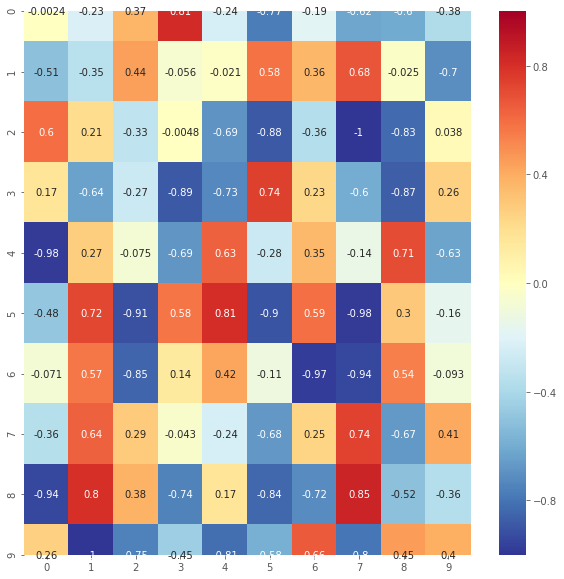

In [2]:
#1.請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
matrix =2* np.random.random(size=(10,10))-1
print(matrix)
plt.figure(figsize=(10,10))
"""
Your Code Here
"""
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, 
            vmin = -1.0, annot = True, vmax = 1.0)

#heatmap = sns.heatmap(matrix.round(3),square=True,annot=True)

plt.show()

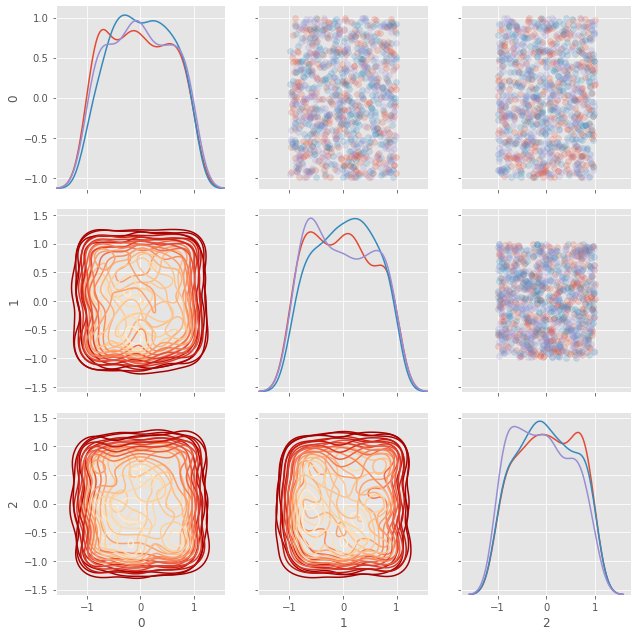

In [3]:
#2.請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，
#並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = 2* np.random.random(size=(1000,3))-1

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow) #從a=[0,1,2]中隨機取元素填入
plot_data = pd.DataFrame(matrix, indice).reset_index() 
#reset_index() 重置DataFrame的索引，並使用默認索引。

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

"""
vars的寫法會等於以下：
vars= []
for x in list(plot_data.columns):
    if x != 'index':
        vars.append(x)
"""

#繪出PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
"""
Your Code Here
Please replace "..." to correct plot function

g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);
"""
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

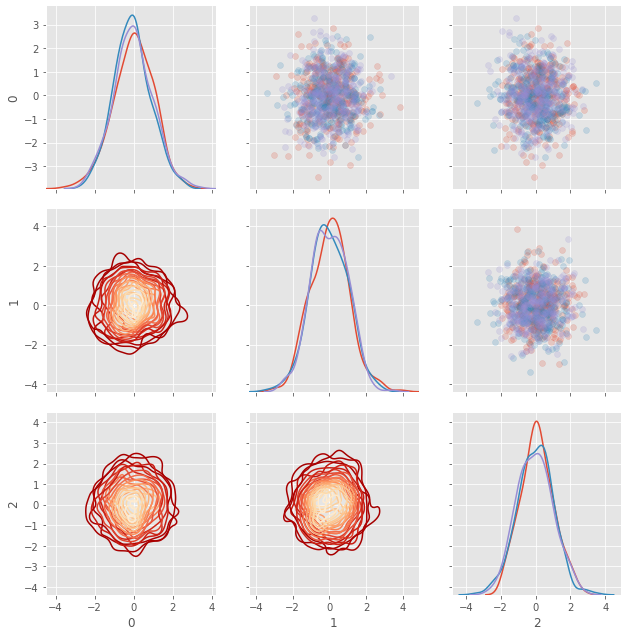

In [5]:
#請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，
#並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.normal(loc=0, scale=1, size=(1000,3))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()